<a href="https://colab.research.google.com/github/SimarBhatiaSB7/Predictive-Analysis-Case-Study-22BDS0046/blob/main/Predictive_Analytics_Source_Code_22BDS0046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import warnings
warnings.filterwarnings('ignore')

##Data Loading & Exploration

In [20]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
print("Dataset Shape:", df.shape)
df.head()
df.info()
df.describe()
print("Missing Values:\n", df.isnull().sum())


Saving healthcare_dataset.csv to healthcare_dataset (4).csv
Dataset Shape: (55500, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results   

In [21]:
print(df.head(6))

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   
5  EMILY JOHNSOn   36    Male         A+            Asthma        2023-12-20   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   
5     Taylor Newton

##Data Cleaning & Missing Value Handling

In [22]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Splitting Data & Problem Type Detection

In [25]:
from sklearn.model_selection import train_test_split

# Classification target: Test Results
target_class = 'Test Results'
X_class = df.drop(columns=[target_class])
y_class = df[target_class]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Regression target: Billing Amount
target_reg = 'Billing Amount'
X_reg = df.drop(columns=[target_reg])
y_reg = df[target_reg]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


##Classification Models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)

print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_log))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_c, y_train_c)
y_pred_rf = rf_model.predict(X_test_c)

print("Random Forest Accuracy:", accuracy_score(y_test_c, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_rf))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3355855855855856

Confusion Matrix:
 [[1521 1183 1050]
 [1411 1147 1059]
 [1492 1180 1057]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.41      0.37      3754
           1       0.33      0.32      0.32      3617
           2       0.33      0.28      0.31      3729

    accuracy                           0.34     11100
   macro avg       0.33      0.34      0.33     11100
weighted avg       0.33      0.34      0.33     11100

Random Forest Accuracy: 0.4446846846846847

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.46      0.45      3754
           1       0.44      0.44      0.44      3617
           2       0.45      0.43      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



##Regression Algorithm

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)
y_pred_lin = lin_reg.predict(X_test_r)

print("Linear Regression R²:", r2_score(y_test_r, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_lin)))

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train_r, y_train_r)
y_pred_rf = rf_reg.predict(X_test_r)

print("Random Forest R²:", r2_score(y_test_r, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_rf)))


Linear Regression R²: -0.0008827772528570144
Linear Regression RMSE: 0.992852291008526
Random Forest R²: 0.10388808787610948
Random Forest RMSE: 0.9394510571068908


In [8]:
print("Final Dataset Shape (with Cluster labels):", df.shape)
display(df.head())

Final Dataset Shape (with Cluster labels): (55500, 16)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Cluster
0,3068,-1.098824,1,5,2,1729,26612,29933,1,-0.470261,0.233120,2,1730,3,2,0
1,15211,0.533639,1,0,5,104,33648,16012,3,0.570250,-0.313556,1,109,1,1,1
2,6476,1.247842,0,1,5,1233,37828,5473,0,0.169990,-0.834199,1,1247,0,2,1
3,26935,-1.200853,0,6,3,560,22511,12317,3,0.870465,1.291761,0,589,1,0,1
4,26241,-0.435636,0,2,2,1230,21259,33598,0,-0.795211,1.361180,2,1249,4,0,0


##Clustering Algorithm (K-Means)

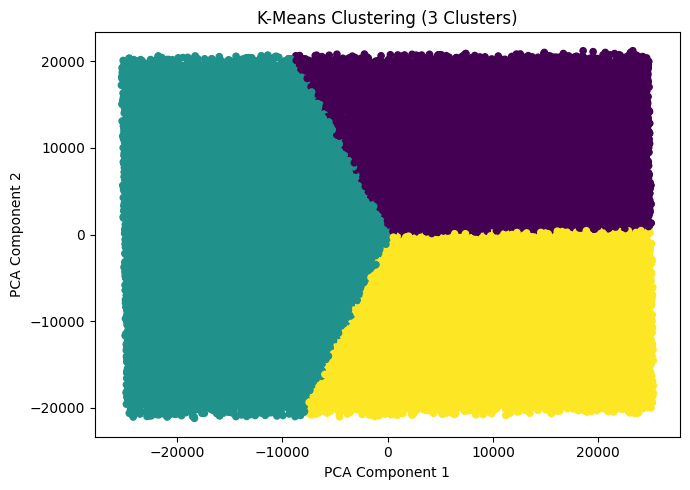

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_data)
df['Cluster'] = clusters

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=clusters, cmap='viridis', s=20)
plt.title("K-Means Clustering (3 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

##Correlation Analysis and Visualization

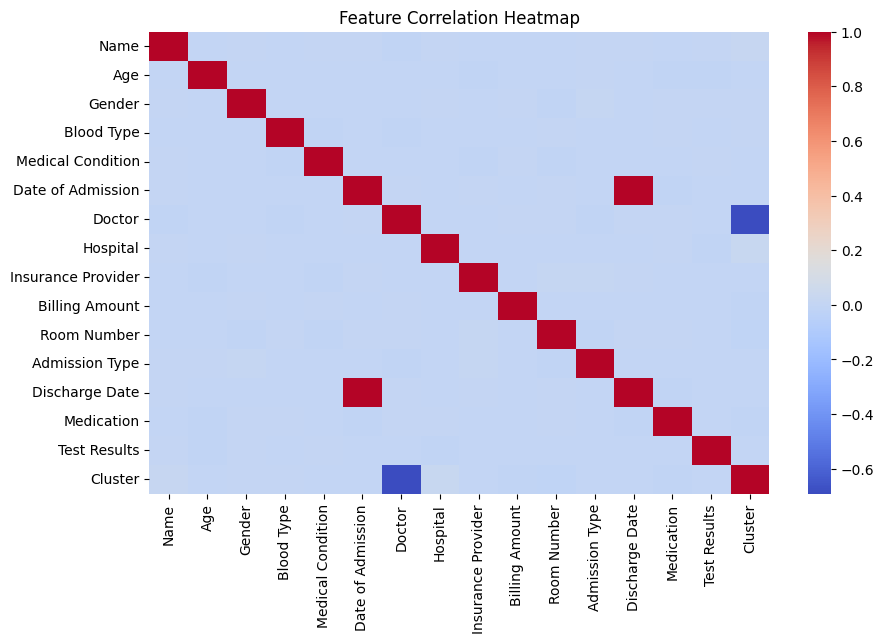

In [31]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [34]:
print("Preprocessed Dataset Shape:", df.shape)
print("\nSample after preprocessing:\n", df.head())

Preprocessed Dataset Shape: (55500, 16)

Sample after preprocessing:
     Name       Age  Gender  Blood Type  Medical Condition  Date of Admission  \
0   3068 -1.098824       1           5                  2               1729   
1  15211  0.533639       1           0                  5                104   
2   6476  1.247842       0           1                  5               1233   
3  26935 -1.200853       0           6                  3                560   
4  26241 -0.435636       0           2                  2               1230   

   Doctor  Hospital  Insurance Provider  Billing Amount  Room Number  \
0   26612     29933                   1       -0.470261     0.233120   
1   33648     16012                   3        0.570250    -0.313556   
2   37828      5473                   0        0.169990    -0.834199   
3   22511     12317                   3        0.870465     1.291761   
4   21259     33598                   0       -0.795211     1.361180   

   Admission Typ